In this notebook, we'll implement a minimal example of a 1D Gaussian process and apply this approach to regression.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [21]:
# The kernel, which describes the correlation between y(x1) and y(x2) as a function of |x1-x2|:
def k(x1, x2, sig=0.1):
    return np.exp(-(x1-x2)**2/(2*sig)**2)

**Exercise**: For $N=100$ evenly spaced x values over $(0,1)$, let $\vec{y}$ be a vector of the corresponding $y$ values such that $p(\vec{y}) = \mathcal{N}(\vec{y} | 0, \mathbf{K})$. Use the kernel function defined above to create the covariance matrix $\mathbf{K}$. Use `np.random.multivariate_normal()` to draw and plot a few samples from this distribution.

Text(0, 0.5, 'y')

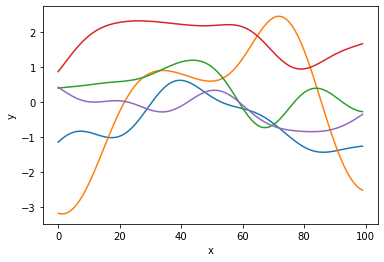

In [22]:
## Solution ##

# Create the covariance matrix:
n = 100# number of points
K = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        K[i,j] = k(i/n, j/n)

# Draw some samples (i.e. functions y(x)) from the distribution over y:
n_samples = 5
y = np.zeros((n_samples, n))
for i in range(n_samples):
    y[i, :] = np.random.multivariate_normal(np.zeros(n), K)

# Plot the results:
plt.plot(np.arange(n), y.T)
plt.xlabel('x')
plt.ylabel('y')

# Gaussian process regression


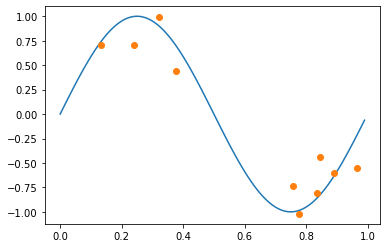

In [23]:
# Make some fake data:
noise = 0.05  # aka beta inverse
n = 10
x = np.random.rand(n)
y = np.sin(2*np.pi*x) + noise**0.5*np.random.randn(n)

n_array = 100
x_array = np.arange(0, 1, 1/n_array)
y_true = np.sin(2*np.pi*x_array)

# Plot the data together with the function that was used to generate it:
plt.plot(x_array, y_true)
plt.plot(x, y, 'o')

**Exercise**: Using the `n` data points defined above, create the covariance matrix $\mathbf{C}_N$. Use this to compute $m(\vec{x}_{N+1})$ and $\sigma^2(\vec{x}_{N+1})$ for the distribution of expected $t$ values corresponding to a new data point, i.e. $p(t_{N+1} | \vec{t}) = \mathcal{N}(t_{N+1} | m(\vec{x}_{N+1}), \sigma^2(\vec{x}_{N+1}))$. Compute these quantities for each data point in `x_array` defined above, and save the results in 1D arrays `m` and `s2`.

In [24]:
## Solution ##

# Create the covariance matrix and take its inverse:
cN = np.zeros((n,n))
for i, x1 in enumerate(x):
    for j, x2 in enumerate(x):
        cN[i, j] = (i==j)*noise + k(x1, x2)

cN_inv = np.linalg.inv(cN)

# The means and variances of predicted t values for each x in x_array:
m, s2 = np.zeros(n_array), np.zeros(n_array)
for i, xx in enumerate(x_array):
    m[i] = k(xx, x) @ cN_inv @ y#dont need to transpose because it is a row vector by default
    s2[i] = k(xx, xx) + noise - k(xx, x) @ cN_inv @ k(xx, x)


**Exercise**: Using the quantities just computed, plot the curve that gives the model predictions. The uncertainty of the prediction can be shown as a shaded region using `plt.fill_between()`.

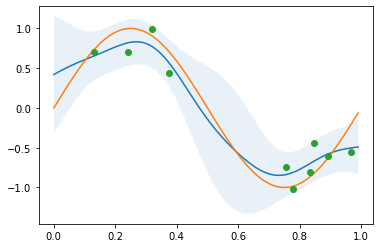

In [25]:
## Solution ##

# Plot the data together with the GP fit:
plt.plot(x_array, m)#model prediction
plt.plot(x_array, y_true)#sine wave
plt.plot(x, y, 'o')#data points
plt.fill_between(x_array, m-s2**0.5, m+s2**0.5, alpha=0.1)